# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Nome**: Beatriz Rogers Tripoli Barbosa

**RA**: 792170 

**Nome**: Laura Naomi Seto

**RA**: 813210


---
### Análise exploratória

Nesta seção, deve ser feita a leitura da base de dados e todas as análises necessárias para interpretar e analisar os dados, tais como:
* Significado de cada atributo
* Medidas descritivas
* Gráficos

In [1050]:
# biblioteca usada para trabalhar com vetores e matrizes
import numpy as np 

# biblioteca usada para trabalhar com dataframes e análise de dados
import pandas as pd

# bibliotecas usadas para geração de graficos
import seaborn as sns
import matplotlib.pyplot as plt

# import scipy
# import sklearn

print('Bibliotecas carregadas com sucesso')

Bibliotecas carregadas com sucesso


In [1051]:
# importa o arquivo e guarda em um dataframe do Pandas
df_dataset = pd.read_csv( 'data/RHP_data.csv', sep=',', index_col=None) 
df_train_id = pd.read_csv('data/train.csv', sep=',', index_col=None)
df_test_id = pd.read_csv('data/test.csv', sep=',', index_col=None)

print('Dados importados com sucesso!')

Dados importados com sucesso!


In [1052]:
# CÉLULA PARA ANÁLISE DOS ATRIBUTOS 
# checando valores possíveis para as colunas para análise dos atributos

# display(df_train_id["CLASSE"].str.lower().unique())

# null_mask = df_dataset["IDADE"].isnull()
# display(df_dataset[pd.to_datetime(df_dataset['Atendimento'], errors='coerce').isna()])


##### Análise dos atributos

* **Id**: Identificação do registro.

* **Peso**: Peso corporal do paciente [kg]
    * valores faltantes
    * tratamento por média
    * REMOVIDA:

* **Altura**: Altura do paciente [cm]
    * valores fora do intervalo aceitável (0 é válido?)
    * tratamento por média
    * REMOVIDA:

* **Índice de Massa Corporal** (IMC): $$\frac{Peso}{Altura^2}$$    
    * valores fora do intervalo válido
    * valores faltantes acarretados por: peso ou altura não registrados ou igual a 0
    * tratamento por média

* **Atendimento**: Data de atendimento [DD/MM/AA]
    * valores inválidos
    * tratamento por substituição por valor padrão (ou marca como inválido)
    * REMOVIDA:

* **Data de Nascimento** (DN): Data de nascimento [DD/MM/AA]
    * valores faltantes
    * valores inválidos
    * tratamento por substituição por valor padrão (ou marca como inválido)
    * REMOVIDA:

* **Idade**: Idade no momento do atendimento [anos]
    * valores não numéricos ('#VALUE!') acarretados por: atendimento e/ou data de nascimento inválidos 
    * valores fora do intervalo aceitável (idades negativas e pacientes não pediátricos)
    * valores faltantes acarretados por: data de nascimento não registrado
    * valores aparentemente válidos mas atendimento e/ou data de nascimento inválidos
    * tratamento por média

* **Convênio**: Tipo de plano de saúde utilizado para o atendimento
    * REMOVIDA:

* **Pulsos**: Avaliação da presença e qualidade dos pulsos arteriais [normais, outro, amplos, femorais diminuidos, diminuídos]
    * adotar formas canônicas para os valores possíveis
    * tratamneto por moda baseado na classe

* **PA Sistólica**: Valor mais alto registrado durante o batimento cardíaco [mmHg]
    * valores fora fora do intervalo aceitável
    * valores faltantes
    * tratamento por média

* **PA Diastólica**: Valor mais baixo registrado entre os batimentos cardíacos [mmHg]
    * valores fora do intervalo aceitável
    * valores faltantes 
    * tratamento por média

* **Pressão de Pulso Arterial** (PPA): [não calculado, normal, pre-hipertensão pas, has-2 pas, pre-hipertensão pad, has-1 pas, has-2 pad, has-1 pad]
    * valor inválido ('#VALUE!')
    * tratamento por moda

* **B2**: Segundo som cardíaco [normal, desdob fixo, outro, hiperfonética, única]
    * tratamento por moda

* **Sopro**: Sopro cardíaco [sistólico, ausente, contínuo, diastólico, 'sistolico e diastólico']
    * adotar formas canônicas para os valores possíveis 
    * tratamento por moda

* **Frequência Cardíaca** (FC): Número de batimentos cardíacos por minuto [bpm]
    * valores faltantes
    * valores fora do intervalo aceitável
    * adotar forma canônica para os valores (ex: 123 ou 100-130)
        * valores não numéricos transformados em NaN
    * tratamento por média

* **História da Doença Atual 1** (HDA 1): registro de um problema de saúde do paciente
    * obs: valores faltantes podem ser: erro de registro ou indicação de histórico inexistente

* **História da Doença Atual 2** (HDA2): registro de um problema de saúde do paciente
    * obs: valores faltantes podem ser: erro de registro ou indicação de histórico inexistente
    * REMOVIDA: 96% dos registros tinham este campo não preenchido

* **Sexo**: Gênero biológico do paciente [masculino, feminino e indeterminado]
    * adotar formas canônicas para os valores possíveis
    * tratamento por moda

* **Motivo 1**: Principal motivo para o atendimento ['6 - Suspeita de cardiopatia', '2 - Check-up', '5 - Parecer cardiológico', '1 - Cardiopatia já estabelecida', nan, '7 - Outro']
    * valores faltantes
    * tratamento por substituição por valor padrão

* **Motivo 2**: Motivo secundário para o atendimento ['6 - Palpitação/taquicardia/arritmia', '6 - Dispnéia', nan, '5 - Atividade física', '5 - Cirurgia', '6 - Sopro', '1 - Cardiopatia adquirida', '1 - Cardiopatia congenica', '6 - Dor precordial', '6 - HAS/dislipidemia/obesidade', '6 - Cianose', 'Outro', '6 - Alterações de pulso/perfusão', '6 - Cardiopatia na familia', '6 - Cansaço', '5 - Uso de cisaprida', '6 - Cianose e dispnéia']
    * valores faltantes
    * tratamento por substituição por valor padrão

* **Classe**: [normal, anormal]
    * adotar formas canônicas para os valores possíveis


#### Exploração dos dados com estatística descritiva

Resumo quantitativo das principais características de um conjunto de dados:
* Frequência
* Localização ou tendência central
* Dispersão ou espalhamento
* Distribuição ou formato

Os três últimos são utilizados geralmente para valores numéricos.

Para dados univariados: 
* Medidas de localidade: moda, média, mediana, média truncada, quartis, percentil (boxplot)
* Medidas de espalhamento: intervalo, variância e descio padrão
* Medidas de distribuição: obliquidade ou assimetria e curtose (histograma e gráfico pizza)

Para dados multivariados:
* Medidas de localidade: calculado para cada atributo separadamente
* Medidas de espalhamento: calculado apra cada atributo separadamente + covariância e correlação (matriz de covariância ou correlação)

In [1053]:
print("Registros de treino fornecidos: ", df_train_id.shape)

# recuperar as partições de treino por Id e concatenar o coluna alvo CLASSE
df_train = pd.merge(df_dataset, df_train_id, on='Id')

# remover os registros de treino que não possuem atributo alvo classificado
df_train = df_train.dropna(subset=['CLASSE'], axis=0)

print("Registros de treino classificados: ", df_train.shape)


Registros de treino fornecidos:  (14727, 2)
Registros de treino classificados:  (13559, 21)


In [1054]:
# ANÁLISE DE VALORES FALTANTES
def analise_valores_faltantes(df):
    missing_data = df.isnull().mean() * 100  # porcentagem de valores faltantes
    print(f"Relação de atributos e porcentagem de nulos: ")
    print(missing_data)

def analise_registro_incompleto(df, p):
    # identificar as linhas com mais de p% não preenchido
    faltantes = df.isnull().sum(axis=1) > (df.shape[1]*p)
    soma = faltantes.sum()
    
    print(f"{soma} de {df.shape[0]} ({soma/df.shape[0]*100}%) registros com mais de {p*100}% dos atributos não preenchidos")
    # display(df[faltantes])
    
    return faltantes

analise_valores_faltantes(df_train)

Relação de atributos e porcentagem de nulos: 
Id                0.000000
Peso              1.858544
Altura            0.000000
IMC              23.438307
Atendimento       1.659414
DN                4.454606
IDADE             4.454606
Convenio         27.369275
PULSOS            0.339258
PA SISTOLICA     39.376060
PA DIASTOLICA    39.449812
PPA               1.452910
B2                0.221255
SOPRO             0.154879
FC                5.501881
HDA 1            25.695110
HDA2             96.061656
SEXO              0.022126
MOTIVO1           2.190427
MOTIVO2          23.991445
CLASSE            0.000000
dtype: float64


---
### Pré-processamento

Nesta seção, as funções da etapa de pré-processamento dos dados devem ser implementadas e aplicadas (se necessário).

##### Abordagens
**Valores faltantes e inválidos** - analisar porcentagem de valores faltantes e natureza dos dados (numérico, categórico, temporais)
- exclusão de linha (poucos faltantes)
- exclusão de coluna (muitos faltantes)
- substituição por média, mediana (melhor quando há outliers) ou moda (dados categóricos)
- substituição por interpolação (adequada para séries temporais)

**Duplicatas** (todos os valores de atributos iguais e mesma classificação) 
- exclusão de linha

**Inconsistências** (todos os valores de atributos iguais e classificados diferentemente)
- exclusão das linhas

In [1055]:
# EXCLUIR ATRIBUTOS CONSIDERADOS IRRELEVANTES

df_train = df_train.drop(columns=['Peso', 'Altura', 'Atendimento', 'DN', 'Convenio', 'HDA2'], axis=1)

In [1056]:
# IDENTIFICAR VALORES FALTANTES E INVÁLIDOS

# col_numerica = ['Id', 'IMC', 'IDADE', 'PA SISTOLICA', 'PA DIASTOLICA', 'FC']    
col_numerica = ['IMC', 'IDADE', 'PA SISTOLICA', 'PA DIASTOLICA', 'FC']   
col_categorica = ['PULSOS', 'PPA', 'B2', 'SOPRO', 'HDA 1', 'SEXO', 'MOTIVO1', 'MOTIVO2']

def invalidar_nao_numerico(df, colunas):
    return df[colunas].apply(pd.to_numeric, errors='coerce')

def padronizar_string(df, colunas):
    return df[colunas].apply(lambda col: col.str.lower() if col.dtype == 'object' else col)

# ATRIBUTOS NUMÉRICOS
    # transformando não numéricos em NaN
df_train[col_numerica] = invalidar_nao_numerico(df_train, col_numerica)
# df_train[col_numerica] = df_train[col_numerica].apply(pd.to_numeric, errors='coerce')
    # identificando valores fora do intervalo aceitável
df_train['IDADE'] = df_train['IDADE'].apply(lambda x: x if 0<x else np.nan)

# ATRIBUTOS CATEGÓRICOS
    # transformando para forma canônica (lower case)
df_train[col_categorica] = padronizar_string(df_train, col_categorica)
# df_train[col_categorica] = df_train[col_categorica].apply(lambda col: col.str.lower() if col.dtype == 'object' else col)
    # identificando valores inválidos e transformando em NaN
        # PPA  
valores_validos = ['normal', 'pre-hipertensão pas', 'has-2 pas', 'pre-hipertensão pad', 'has-1 pas', 'has-2 pad', 'has-1 pad']
df_train['PPA'] = df_train['PPA'].apply(lambda x: x if x in valores_validos else np.nan)
        # SEXO
valores_validos_f = ['f', 'feminino']
valores_validos_m = ['m', 'masculino']
df_train['SEXO'] = df_train['SEXO'].apply(lambda x: 'f' if x in valores_validos_f else 'm' if x in valores_validos_m else np.nan)
        # CLASSE
valores_validos_0 = ['normal', 'normais']
valores_validos_1 = ['anormal']
df_train['CLASSE'] = df_train['CLASSE'].apply(lambda x: 'normal' if x in valores_validos_0 else 'anormal' if x in valores_validos_1 else np.nan)

In [1057]:
# EXCLUIR REGISTROS COM MENOS DE 50% DOS VALORES PREENCHIDOS 

def remover_registros_incompletos(df, p):
    faltantes = df.isnull().sum(axis=1) > (df.shape[1]*p)
    df = df[~faltantes]

remover_registros_incompletos(df_train, 0.5)

print("Conjunto de treino sem registros com baixa taxa de preenchimento: ", df_train.shape)

Conjunto de treino sem registros com baixa taxa de preenchimento:  (13559, 15)


In [1058]:
# PREENCHER FALTANTES 

from sklearn.impute import SimpleImputer
# from sklearn.impute import IterativeImputer 

def preencher_faltante(df):
    df_copy = df.copy()
    col_numerica = df.select_dtypes(include=['number']).columns
    col_categorica = df.select_dtypes(exclude=['number']).columns

    # números com médias
    if len(col_numerica) > 0:
        imputer_media = SimpleImputer(strategy='mean')
        df_copy[col_numerica] = imputer_media.fit_transform(df_copy[col_numerica])

    # categóricos com moda
    if len(col_categorica) > 0:
        imputer_moda = SimpleImputer(strategy='most_frequent')
        df_copy[col_categorica] = imputer_moda.fit_transform(df_copy[col_categorica])


    print(df_copy.shape)
    return df_copy

# df_train = preencher_faltante(df_train)


# NUMÉRICOS COM MÉDIA
imputer_media = SimpleImputer(strategy='mean')
df_train[col_numerica] = imputer_media.fit_transform(df_train[col_numerica])

# CATEGÓRICOS COM MODA
imputer_moda = SimpleImputer(strategy='most_frequent')
df_train[col_categorica] = imputer_moda.fit_transform(df_train[col_categorica])


In [1059]:
# EXLUIR DUPLICATAS (mesmos valores de atributos e mesma classifiação)

def remover_duplicatas(df):
    # ignora o índice 
    return df.drop_duplicates(subset=df.columns[1:], keep='first')

df_train = remover_duplicatas(df_train)
print("Conjunto de treino sem duplicatas: ", df_train.shape)

Conjunto de treino sem duplicatas:  (13215, 15)


In [1060]:
# EXCLUIR INCONSISTÊNCIAS (mesmos valores de atributos e classificação diferente)

def remover_inconsistencia(df):
    # ignora o índice e a classe (atributo alvo)
    return df.drop_duplicates(subset=df.columns[1:-1], keep=False)

df_train = remover_inconsistencia(df_train)
print("Registros de treino sem inconsistências: ", df_train.shape)


Registros de treino sem inconsistências:  (13215, 15)


In [1061]:
# GERAR ESTATÍSTICA DO CONJUNTO ANTES DA REMOÇÃO DE OUTLIERS

df_detalhes = df_train.describe(include='all')
display(df_detalhes)

,Id,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,SEXO,MOTIVO1,MOTIVO2,CLASSE
count,13215.00000,13215.000000,13215.000000,13215,13215.000000,13215.000000,13215,13215,13215,13215.000000,13215,13215,13215,13215,0.0
unique,NaN,NaN,NaN,5,NaN,NaN,7,5,5,NaN,8,2,5,16,NaN
top,NaN,NaN,NaN,normais,NaN,NaN,normal,normal,ausente,NaN,assintomático,m,5 - parecer cardiológico,5 - cirurgia,NaN
freq,NaN,NaN,NaN,13081,NaN,NaN,12472,12632,8495,NaN,10637,7875,6389,6368,NaN
mean,8908.56678,17.813756,6.492879,NaN,101.401876,62.382568,NaN,NaN,NaN,93.933943,NaN,NaN,NaN,NaN,NaN
std,5163.37036,10.068728,4.844881,NaN,11.784071,7.036729,NaN,NaN,NaN,109.307538,NaN,NaN,NaN,NaN,NaN
min,2.00000,0.000000,0.010000,NaN,10.000000,6.000000,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN
25%,4414.50000,16.000000,2.630000,NaN,100.000000,60.000000,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN
50%,8879.00000,17.791735,6.300000,NaN,101.392336,62.373203,NaN,NaN,NaN,90.000000,NaN,NaN,NaN,NaN,NaN
75%,13364.00000,19.000000,9.825000,NaN,101.392336,62.373203,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,NaN


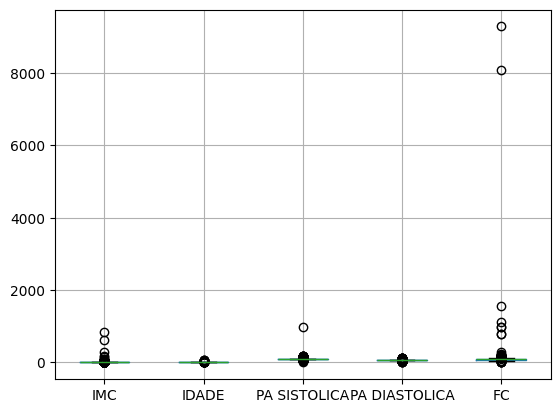

In [ ]:
# IDENTIFICAR OUTLIERS SEM CONSIDERAR RELAÇÃO ENTRE ATRIBUTOS
# identificação de outliers por atributo 

# por boxplot
df_train.boxplot(column=['IMC', 'IDADE', 'PA SISTOLICA', 'PA DIASTOLICA', 'FC'])
plt.show()

def identificar_outlier(coluna):
    # considera medida de dispersão
    Q1 = coluna.quantile(0.25)
    Q3 = coluna.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    print(f"Limite inf: {limite_inferior}\nLimite sup: {limite_superior}")
    return coluna[(coluna < limite_inferior) | (coluna > limite_superior)]

def identificar_outlier_percentil(coluna, p_inf, p_sup):
    # exluir os menores que p_inf e os maiores que p_sup
    # não considera dispersão, ilda apenas com as extremidades
    limite_inferior = np.percentile(coluna, p_inf*100)
    limite_superior = np.percentile(coluna, p_sup*100)
    print(f"Limite inf: {limite_inferior}\nLimite sup: {limite_superior}")
    return coluna[(coluna < limite_inferior) | (coluna > limite_superior)]

def invalidar_outliers_quartil(df, colunas):
    # marca outliers como NaN
    df_copy = df.copy()
    for coluna in colunas:
        Q1 = df_copy[coluna].quantile(0.25)
        Q3 = df_copy[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        df_copy.loc[~df[coluna].between(limite_inferior, limite_superior), coluna] = np.nan
    return df_copy

def invalidar_outliers_percentil(df, colunas, p_inf, p_sup):
    # marca outliers como NaN
    df_copy = df.copy()
    for coluna in colunas:
        limite_inferior = np.percentile(df_copy[coluna], p_inf*100)
        limite_superior = np.percentile(df_copy[coluna], p_sup*100)
        df_copy.loc[~df_copy[coluna].between(limite_inferior, limite_superior), coluna] = np.nan
    return df_copy

df_train = invalidar_outliers_quartil(df_train, ['IMC', 'IDADE', 'PA SISTOLICA', 'PA DIASTOLICA', 'FC'])

analise_valores_faltantes(df_train)


# exlusão dos registros que, após marcados como outliers, possuem menos de 50% dos valores preenchidos 
faltantes = analise_registro_incompleto(df_train, 0.5)
df_train = df_train[~faltantes]


# peenchimento dos valores nulos com média
df_train[col_numerica] = imputer_media.fit_transform(df_train[col_numerica])
analise_valores_faltantes(df_train)



In [ ]:
# GERA ESTATÍSTICA DO CONJUNTO PÓS REMOÇÃO DE OUTLIERS

df_detalhes = df_train.describe(include='all')
display(df_detalhes)

,Id,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,SEXO,MOTIVO1,MOTIVO2,CLASSE
count,13215.00000,13215.000000,13215.000000,13215,13215.000000,13215.000000,13215,13215,13215,13215.000000,13215,13215,13215,13215,0.0
unique,NaN,NaN,NaN,5,NaN,NaN,7,5,5,NaN,8,2,5,16,NaN
top,NaN,NaN,NaN,normais,NaN,NaN,normal,normal,ausente,NaN,assintomático,m,5 - parecer cardiológico,5 - cirurgia,NaN
freq,NaN,NaN,NaN,13081,NaN,NaN,12472,12632,8495,NaN,10637,7875,6389,6368,NaN
mean,8908.56678,17.269182,6.379885,NaN,100.833486,61.501158,NaN,NaN,NaN,90.662953,NaN,NaN,NaN,NaN,NaN
std,5163.37036,2.147115,4.515203,NaN,0.552158,1.201636,NaN,NaN,NaN,13.208935,NaN,NaN,NaN,NaN,NaN
min,2.00000,12.000000,0.010000,NaN,98.000000,57.000000,NaN,NaN,NaN,50.000000,NaN,NaN,NaN,NaN,NaN
25%,4414.50000,16.000000,2.630000,NaN,100.000000,60.000000,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN
50%,8879.00000,17.269182,6.300000,NaN,100.833486,61.501158,NaN,NaN,NaN,90.000000,NaN,NaN,NaN,NaN,NaN
75%,13364.00000,18.000000,9.730000,NaN,101.392336,62.373203,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,NaN


In [1048]:
# IDENTIFICAR OUTLIERS CONSIDERANDO TODOS OS ATRIBUTOS
# identificação de outliers por registro 
# uma estratégia é a aplicação do PCA para redução de dimensionalidade 

In [ ]:
# NORMALIZAR ATRIBUTOS

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_train[col_numerica] = scaler.fit_transform(df_train[col_numerica])

display(df_train)
analise_valores_faltantes(df_train)


,Id,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,SEXO,MOTIVO1,MOTIVO2,CLASSE
0,2,-1.522650,-1.408602,normais,1.012157e+00,0.725743,normal,normal,ausente,2.826758,dispneia,m,6 - suspeita de cardiopatia,6 - dispnéia,NaN
1,3,0.243384,0.021106,normais,1.012157e+00,0.725743,normal,normal,sistólico,-0.201610,assintomático,m,2 - check-up,5 - cirurgia,NaN
2,4,0.806144,-1.302291,normais,1.012157e+00,0.725743,normal,normal,ausente,0.101227,assintomático,m,5 - parecer cardiológico,5 - cirurgia,NaN
3,6,1.737661,-0.438510,normais,-1.509563e+00,-1.249309,normal,desdob fixo,ausente,0.706900,assintomático,m,2 - check-up,5 - cirurgia,NaN
4,7,0.340385,1.441876,normais,1.012157e+00,0.725743,normal,normal,ausente,0.404064,dor precordial,m,5 - parecer cardiológico,5 - cirurgia,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14722,17868,-1.056891,-0.939060,normais,-2.573790e-14,0.000000,normal,normal,ausente,0.706900,assintomático,m,5 - parecer cardiológico,5 - cirurgia,NaN
14723,17869,-0.591133,-1.147253,normais,1.012157e+00,0.725743,normal,normal,ausente,0.101227,assintomático,m,5 - parecer cardiológico,5 - cirurgia,NaN
14724,17871,1.737661,0.000000,normais,-2.573790e-14,0.000000,normal,normal,ausente,-1.110120,dor precordial,f,1 - cardiopatia já estabelecida,1 - cardiopatia congenica,NaN
14725,17872,-1.056891,0.021106,normais,-2.573790e-14,0.000000,normal,normal,sistólico,0.259212,assintomático,f,6 - suspeita de cardiopatia,6 - dor precordial,NaN


Relação de atributos e porcentagem de nulos: 
Id                 0.0
IMC                0.0
IDADE              0.0
PULSOS             0.0
PA SISTOLICA       0.0
PA DIASTOLICA      0.0
PPA                0.0
B2                 0.0
SOPRO              0.0
FC                 0.0
HDA 1              0.0
SEXO               0.0
MOTIVO1            0.0
MOTIVO2            0.0
CLASSE           100.0
dtype: float64


---
### Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais padrões e testando diferentes modelos.

---
### Análise dos Resultados

Nesta seção, os resultados devem ser exibidos através de tabelas e gráficos, comparados e profundamente analisados.